# Chapter 1. Neural encoding I: Firing rates and spike statistics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.integrate import odeint
from spike_generator import *
%matplotlib notebook
plt.style.use('seaborn-whitegrid')

## Task 1
Generate spikes for 10 s (or longer if you want better statistics) using
a Poisson spike generator with a constant rate of 100 Hz, and record
their times of occurrence. Compute the coefficient of variation of the
interspike intervals, and the Fano factor for spike counts obtained
over counting intervals ranging from 1 to 100 ms. Plot the interspike
interval histogram.

In [2]:
spikes = HomogeneousPoissonEfficient(100, 10)
print('Fano factors for spike counts over 10 s duration (with different intervals [0, 100] ms)')
print(fano(spikes)[0])

Fano factors for spike counts over 10 s duration (with different intervals [0, 100] ms)
1.003301443453295


In [3]:
m = HomogeneousPoisson(100, 100)
m2 = HomogeneousPoissonEfficient(100, 100)

#plt.vlines(m, 0, 1)
#plt.vlines(m2, 0, 1)
#plt.title('Spike Train', loc='left')

## ISI (interspike intervals) distribution (density)

<IPython.core.display.Javascript object>


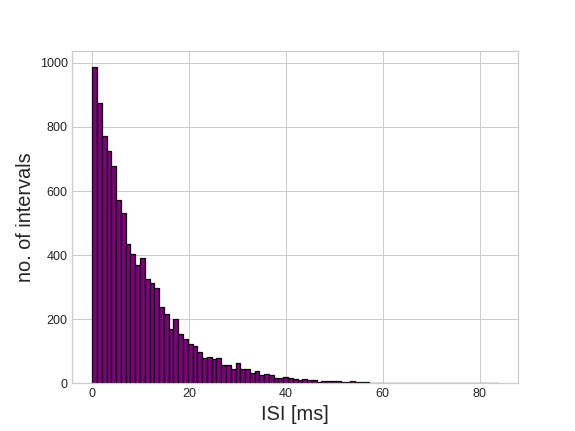

In [5]:
ISI_distribution( HomogeneousPoissonEfficient(100, 100) )

As can be seen, distribution is exponentially decaying, which makes sense, because the longer it has been since
last spike the more likely it will be fired soon. 
Due to the absense of refractoriness, distribution has the peak at 0. But in real neurons there is refractoriness
after firing the spike and, thus, no spike can be fired immediately after this event.

## Spike counts distribution
Firing rate 100 Hz

<IPython.core.display.Javascript object>


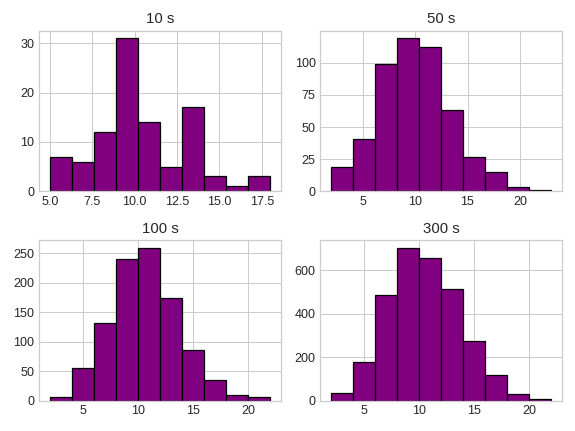

In [7]:
spikes = HomogeneousPoissonEfficient(100, 600)
distribution_spike_counts(spikes)

fig, axs = plt.subplots(2, 2)
fig.dpi=100
axs[0, 0].hist( distribution_spike_counts(HomogeneousPoissonEfficient(100, 10)), color='purple', ec='black')
axs[0, 0].set_title('10 s')
axs[0, 1].hist( distribution_spike_counts(HomogeneousPoissonEfficient(100, 50)), color='purple', ec='black' )
axs[0, 1].set_title('50 s')
axs[1, 0].hist( distribution_spike_counts(HomogeneousPoissonEfficient(100, 100)), color='purple', ec='black' )
axs[1, 0].set_title('100 s')
axs[1, 1].hist( distribution_spike_counts(HomogeneousPoissonEfficient(100, 300)), color='purple', ec='black' )
axs[1, 1].set_title('300 s')
plt.tight_layout()

As can be seen, for larger simulation times, distribution of counter spikes approaches normal distribution

## Compute the coefficient of variation ($C_V$) of ISI

In [7]:
isi = np.diff(m)
cv = coefficient_variation(isi)
print('Coefficient of variation: %s' % cv)

Coefficient of variation: 1.0190307306242166


## Compute the coefficient of variation ($C_V$) and fano factor for spike counts

In [8]:
cv = coefficient_variation(m)
print('Coefficient of variation: %s' % cv)

fano_factor = fano(m)
print('Fano factor: %s' % fano_factor[0])

Coefficient of variation: 0.5797947164523104
Fano factor: 0.8983778053366406


## Task 2

Add a refractory period to the Poisson spike generator by allowing
the firing rate to depend on time. Initially, set the firing rate to a
constant value, $r(t) = r_0 $. After every spike, set $r(t)$ to 0, and then
allow it to recover exponentially back to $r_0$ with a time constant $\tau_{ref}$
that controls the refractory recovery rate. In other words, have $r(t)$
obey the equation

$$
\tau_{ref} \frac{dr}{dt} = r_0 - r
$$

except immediately after a spike, when it is set to 0.
Plot the coefficient of variation as a function of $\tau_{ref}$ over
the range $1 \ ms\ \le \tau_{ref} \le 20 \ ms$, and plot interspike interval histograms for a few values of $\tau_{ref}$ in this range.
Compute the Fano factor for spike counts obtaines over counting
intervals ranging from 1 to 100 ms for the case $\tau_{ref}=10 \ ms$

If we solve the above equaition, we will get:
$$
r(t) = r_0 - (r_0 - r_{init})\cdot \exp{\left(-\frac{t}{\tau_{ref}}\right)}
$$

<IPython.core.display.Javascript object>


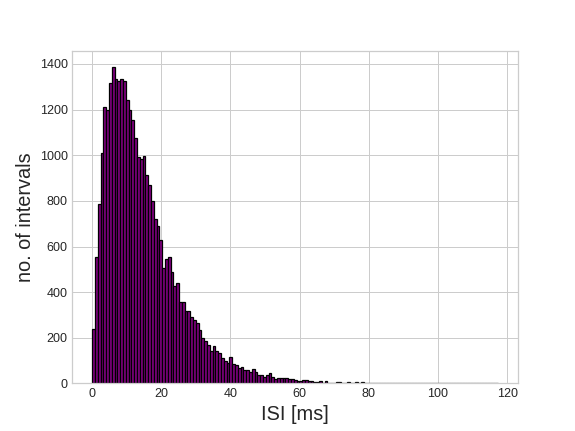

In [9]:
spikes_refrac = HomogeneousPoissonRefractory(100, 500, tau=5)
ISI_distribution(spikes_refrac)

<IPython.core.display.Javascript object>


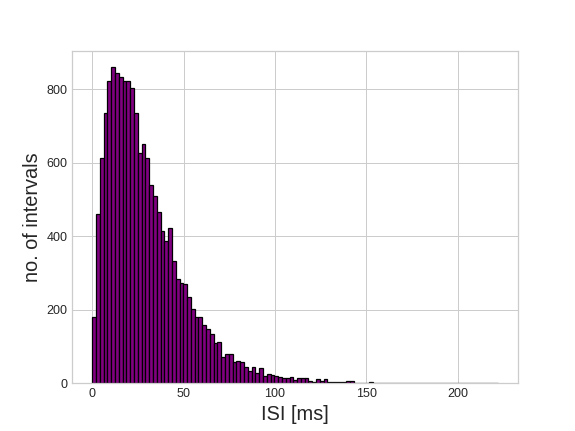

In [10]:
spikes_refrac = HomogeneousPoissonRefractory(100, 500, tau=20)
ISI_distribution(spikes_refrac)

<IPython.core.display.Javascript object>


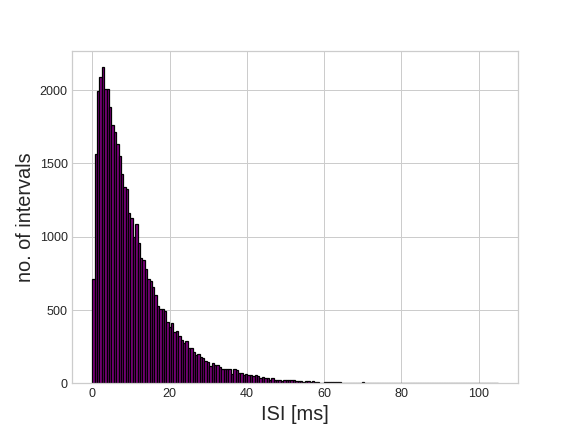

In [11]:
spikes_refrac = HomogeneousPoissonRefractory(100, 500, tau=1)
ISI_distribution(spikes_refrac)

Plottting coefficient of variation ($C_V$) of ISI as a fucntion of $\tau_{ref}$

In [12]:
coeffs = []
for i in range(1, 21):
    spikes = HomogeneousPoissonRefractory(100, 500, tau=i)
    isi = np.diff(spikes)
    coeffs.append(coefficient_variation(isi))

<IPython.core.display.Javascript object>


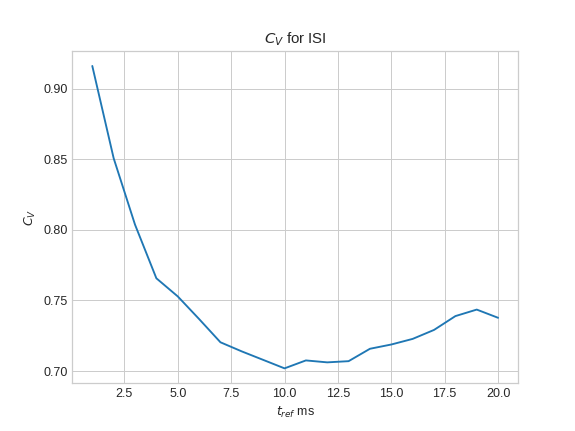

In [13]:
plt.figure()
plt.plot([i for i in range(1, 21)], coeffs)
plt.xlabel('$t_{ref}$ ms')
plt.ylabel('$C_V$')
plt.title('$C_V$ for ISI')
plt.show()

Plottting coefficient of variation ($C_V$) of spike_counts as a fucntion of $\tau_{ref}$

In [15]:
coeffs = []
for i in range(1, 21):
    spikes = HomogeneousPoissonRefractory(100, 500, tau=i)
    coeffs.append(coefficient_variation(spike_count(spikes, step_interval=100)))

<IPython.core.display.Javascript object>


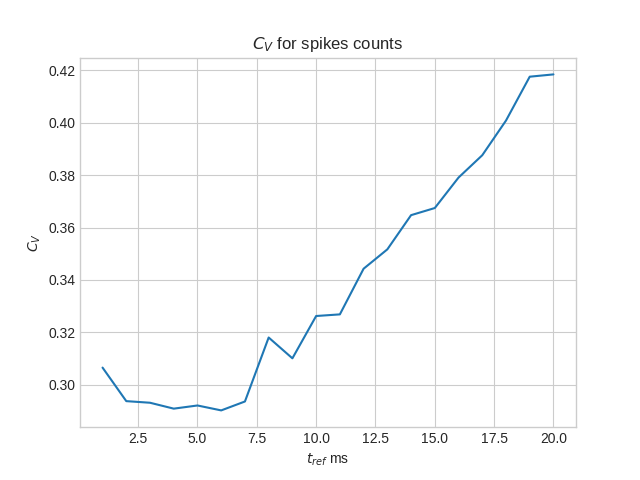

In [16]:
plt.figure()
plt.plot([i for i in range(1, 21)], coeffs)
plt.xlabel('$t_{ref}$ ms')
plt.ylabel('$C_V$')
plt.title('$C_V$ for spikes counts')
plt.show()

Computing Fano factors for spikes counts with step intervals [1, 100] ms

In [17]:
print( fano(HomogeneousPoissonRefractory(100, 10, tau=10)) )

[0.9552054641523813, 0.9104011301291106, 0.882009835080095, 0.8371957028811721, 0.8005929892572029, 0.7762265508709323, 0.7600028760425654, 0.7562017694926841, 0.7034065544206123, 0.6995466342521108, 0.6955690711587472, 0.6627557160048134, 0.695722102293372, 0.6629673973107385, 0.6719031184518675, 0.6224311238586429, 0.6522607311419555, 0.6560188199088596, 0.6401483216237316, 0.6122080226025822, 0.6324676445211389, 0.6276553396301524, 0.6473626055740239, 0.6273273793325251, 0.6253030116274294, 0.6648044992252884, 0.5873428406415211, 0.6169184011788542, 0.5895920701486846, 0.6296417703668885, 0.6382446828968116, 0.5977928625302688, 0.613614156986212, 0.6049627930397807, 0.6032930687374174, 0.5866278037521454, 0.5719093732311412, 0.57713693337103, 0.5702041641398827, 0.6252855363960977, 0.5860318424070701, 0.5913423972495702, 0.5973713962690785, 0.6436730225344404, 0.6446051219853522, 0.5566914852997328, 0.640736158366842, 0.5662831814333383, 0.5696003250215834, 0.6277477924602434, 0.537